<a href="https://colab.research.google.com/github/vasthav2k/convolutionalneuralnetworks/blob/master/Course_2_Part_2_Lesson_2_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%xmode Verbose

Exception reporting mode: Verbose


In [0]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2020-06-10 10:52:31--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.203.128, 2607:f8b0:400c:c11::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   173MB/s    in 0.4s    

2020-06-10 10:52:31 (173 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
import os
import zipfile

In [0]:
local = '/tmp/cats_and_dogs_filtered.zip'
zip_ref=zipfile.ZipFile(local,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
base_dir='/tmp/cats_and_dogs_filtered'

In [0]:
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')

In [0]:
train_cats_dir=os.path.join(train_dir,'cats')
train_dogs_dir=os.path.join(train_dir,'dogs')

In [0]:
validation_cats_dir=os.path.join(validation_dir,'cats')
validation_dogs_dir=os.path.join(validation_dir,'dogs')

In [0]:
train_cats_names=os.listdir(train_cats_dir)
train_dogs_names=os.listdir(train_dogs_dir)

In [0]:
print(train_cats_names[:10])
print(train_dogs_names[:10])
print(len(train_cats_names))
print(len(train_dogs_names))

['cat.620.jpg', 'cat.229.jpg', 'cat.567.jpg', 'cat.200.jpg', 'cat.774.jpg', 'cat.297.jpg', 'cat.374.jpg', 'cat.140.jpg', 'cat.422.jpg', 'cat.146.jpg']
['dog.904.jpg', 'dog.570.jpg', 'dog.268.jpg', 'dog.144.jpg', 'dog.571.jpg', 'dog.736.jpg', 'dog.92.jpg', 'dog.801.jpg', 'dog.85.jpg', 'dog.969.jpg']
1000
1000


In [0]:
validation_cats_names=os.listdir(validation_cats_dir)
validation_dogs_names=os.listdir(validation_dogs_dir)

In [0]:
print(validation_cats_names[:10])
print(validation_dogs_names[:10])
print(len(validation_cats_names))
print(len(validation_cats_names))

['cat.2132.jpg', 'cat.2152.jpg', 'cat.2315.jpg', 'cat.2308.jpg', 'cat.2271.jpg', 'cat.2042.jpg', 'cat.2494.jpg', 'cat.2341.jpg', 'cat.2376.jpg', 'cat.2279.jpg']
['dog.2042.jpg', 'dog.2430.jpg', 'dog.2328.jpg', 'dog.2427.jpg', 'dog.2004.jpg', 'dog.2247.jpg', 'dog.2323.jpg', 'dog.2225.jpg', 'dog.2488.jpg', 'dog.2436.jpg']
500
500


In [0]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


In [0]:
nrows=4
ncols=4
pic_index=0

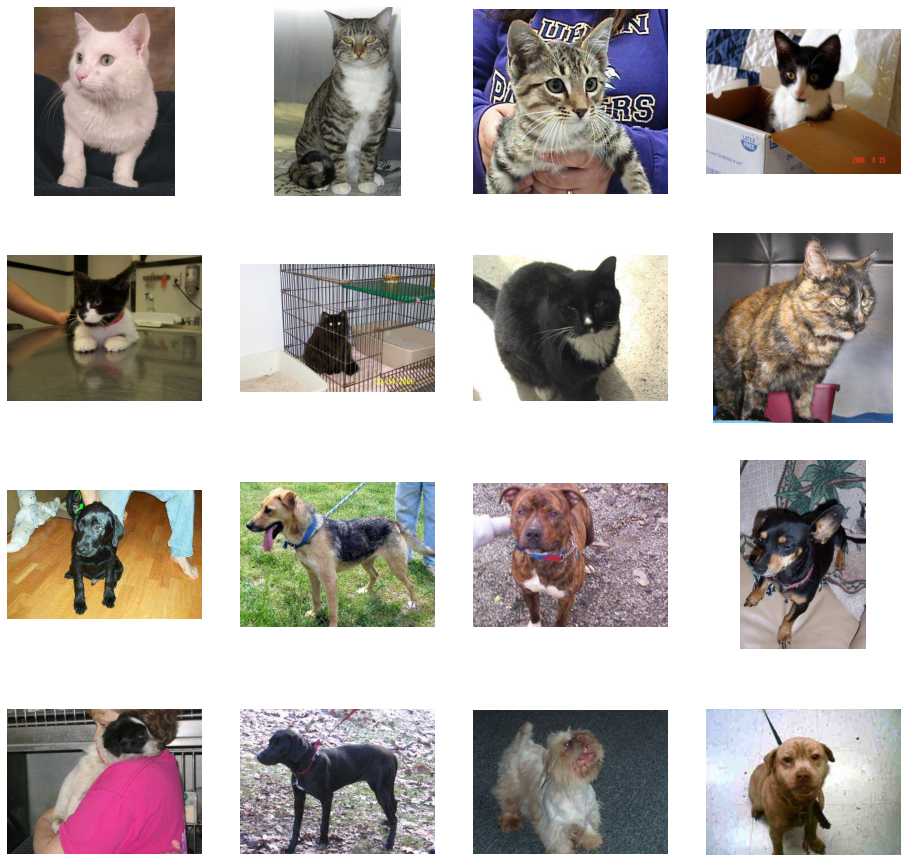

In [0]:
fig=plt.gcf()
fig.set_size_inches(ncols*4,nrows*4)
pic_index+=8
next_cat_pix=[os.path.join(train_cats_dir,fname) for fname in train_cats_names[pic_index-8:pic_index]]
next_dog_pix=[os.path.join(train_dogs_dir,fname) for fname in train_dogs_names[pic_index-8:pic_index]]

for i,imgpath in enumerate(next_cat_pix+next_dog_pix):
  sp=plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')
  img=mpimg.imread(imgpath)
  plt.imshow(img)
plt.show()

In [0]:
import tensorflow as tf

In [0]:
model=tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)),
          tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
          tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu') ,
          tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
          tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
          tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(512,activation='relu'),
          tf.keras.layers.Dense(1,activation='sigmoid'),

])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [0]:
from tensorflow.keras.optimizers import RMSprop

In [0]:
model.compile(optimizer=RMSprop(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
train_data_gen=ImageDataGenerator(rescale=1/255)
test_data_gen=ImageDataGenerator(rescale=1/255)

In [0]:
train_generator=train_data_gen.flow_from_directory(train_dir,batch_size=20,class_mode='binary',target_size=(150,150))

Found 2000 images belonging to 2 classes.


In [0]:
test_generator=test_data_gen.flow_from_directory(validation_dir,target_size=(150,150),class_mode='binary',batch_size=20)

Found 1000 images belonging to 2 classes.


In [0]:
history=model.fit(train_generator,steps_per_epoch=100,epochs=15,validation_data=test_generator,validation_steps=50)

Epoch 1/15
100/100 [==============================] - 57s 570ms/step - loss: 0.8237 - accuracy: 0.5595 - val_loss: 0.6857 - val_accuracy: 0.5440
Epoch 2/15
100/100 [==============================] - 57s 566ms/step - loss: 0.6366 - accuracy: 0.6580 - val_loss: 0.6250 - val_accuracy: 0.6790
Epoch 3/15
100/100 [==============================] - 57s 568ms/step - loss: 0.5769 - accuracy: 0.7200 - val_loss: 0.6539 - val_accuracy: 0.6560
Epoch 4/15
100/100 [==============================] - 57s 566ms/step - loss: 0.4808 - accuracy: 0.7670 - val_loss: 0.6018 - val_accuracy: 0.7000
Epoch 5/15
100/100 [==============================] - 57s 566ms/step - loss: 0.3807 - accuracy: 0.8215 - val_loss: 0.8610 - val_accuracy: 0.6540
Epoch 6/15
100/100 [==============================] - 57s 567ms/step - loss: 0.2707 - accuracy: 0.8835 - val_loss: 0.6738 - val_accuracy: 0.7050
Epoch 7/15
100/100 [==============================] - 57s 567ms/step - loss: 0.2025 - accuracy: 0.9100 - val_loss: 0.8626 - val_ac

In [0]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a dog")
  else:
    print(fn + ' is a cat')

Saving cat.jfif to cat.jfif
[0.]
cat.jfif is a cat


Text(0.5, 1.0, 'Training and validation loss')

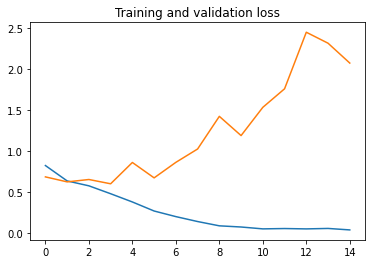

In [0]:
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]
epochs   = range(len(acc)) # Get number of epochs

plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide


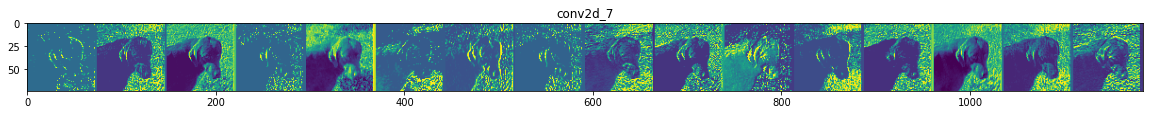

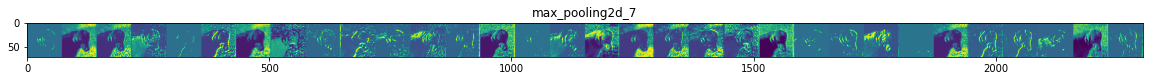

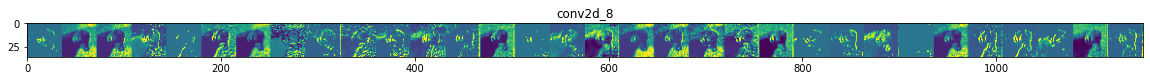

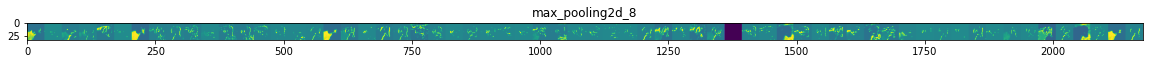

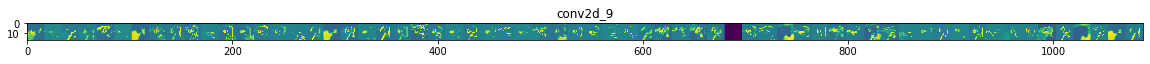

In [0]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cats_names]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dogs_names]

img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

In [0]:
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=15,validation_data=test_generator,validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
100/100 [==============================] - 58s 577ms/step - loss: 0.0371 - accuracy: 0.9885 - val_loss: 1.8916 - val_accuracy: 0.7040
Epoch 2/15
100/100 [==============================] - 57s 568ms/step - loss: 0.0283 - accuracy: 0.9905 - val_loss: 2.1523 - val_accuracy: 0.7150
Epoch 3/15
100/100 [==============================] - 58s 580ms/step - loss: 0.0166 - accuracy: 0.9940 - val_loss: 2.5599 - val_accuracy: 0.6900
Epoch 4/15
100/100 [==============================] - 58s 576ms/step - loss: 0.0275 - accuracy: 0.9910 - val_loss: 2.6821 - val_accuracy: 0.7010
Epoch 5/15
100/100 [==============================] - 57s 569ms/step - loss: 0.0376 - accuracy: 0.9895 - val_loss: 2.3039 - val_accuracy: 0.7190
Epoch 6/15
100/100 [==============================] - 57s 572ms/step - loss: 0.0190 - accuracy: 0.9960 - val_loss: 2.9397 - val_accuracy: 0.7180
Epoch 7/15
100/100 [==============================] - 